Let's start by reading the data into a pandas DataFrame.

Import the Pandas library, read the data from the CSV file and check the data using the head(), describe(), and other Pandas commands.

In [1]:
import pandas as pd

df = pd.read_csv("../data/accent-recognition-data.csv", )

df.head()

language         X1        X2        X3         X4        X5         X6   
0       ES   7.071476 -6.512900  7.650800  11.150783 -7.657312  12.484021  \
1       ES  10.982967 -5.157445  3.952060  11.529381 -7.638047  12.136098   
2       ES   7.827108 -5.477472  7.816257   9.187592 -7.172511  11.715299   
3       ES   6.744083 -5.688920  6.546789   9.000183 -6.924963  11.710766   
4       ES   5.836843 -5.326557  7.472265   8.847440 -6.773244  12.677218   

          X7        X8        X9       X10       X11       X12  
0 -11.709772  3.426596  1.462715 -2.812753  0.866538 -5.244274  
1 -12.036247  3.491943  0.595441 -4.508811  2.332147 -6.221857  
2 -13.847214  4.574075 -1.687559 -7.204041 -0.011847 -6.463144  
3 -12.374388  6.169879 -0.544747 -6.019237  1.358559 -6.356441  
4 -12.315061  4.416344  0.193500 -3.644812  2.151239 -6.816310

In [2]:
df.describe()

X1          X2          X3          X4          X5          X6   
count  329.000000  329.000000  329.000000  329.000000  329.000000  329.000000  \
mean     5.645227   -4.270814    2.635319    7.200207   -5.648733    9.810236   
std      5.105302    3.514350    3.635323    4.310095    4.596180    3.624654   
min     -6.067831  -14.972962   -6.186583   -8.844231  -15.656596   -3.528964   
25%      2.065603   -6.515764    0.137042    4.700874   -8.417684    8.643563   
50%      4.954206   -4.252512    2.029268    7.804680   -6.786670   10.379330   
75%      9.793648   -1.560250    4.178026   10.129165   -4.463308   11.784360   
max     17.749851    3.570765   17.066487   16.178942    7.912809   21.445837   

               X7          X8          X9         X10         X11         X12  
count  329.000000  329.000000  329.000000  329.000000  329.000000  329.000000  
mean    -9.408053    5.117328   -1.229432   -2.362288    2.430833   -3.980415  
std      2.484117    2.650608    3.634849    5.042034    3.478467    2.985879  
min    -15.365665   -2.873862  -15.510974  -11.429178  -13.664104  -13.724103  
25%    -11.120860    3.482167   -1.749082   -5.083522    1.197789   -5.941409  
50%     -9.710399    4.843103   -0.389970   -3.323147    3.169703   -4.374334  
75%     -7.989370    6.588931    0.779993   -1.506037    4.673452   -2.191658  
max     -0.424033   13.846083    4.789989   16.326455    9.166066    5.259430

Import the MatPlotLib and Seaborn libraries and create a scatterplot matrix of the data 

A scatterplot plots the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. It makes an efficient tool to look for errors in our data. We can even have the plotting package color each entry by its class to look for trends within the classes.

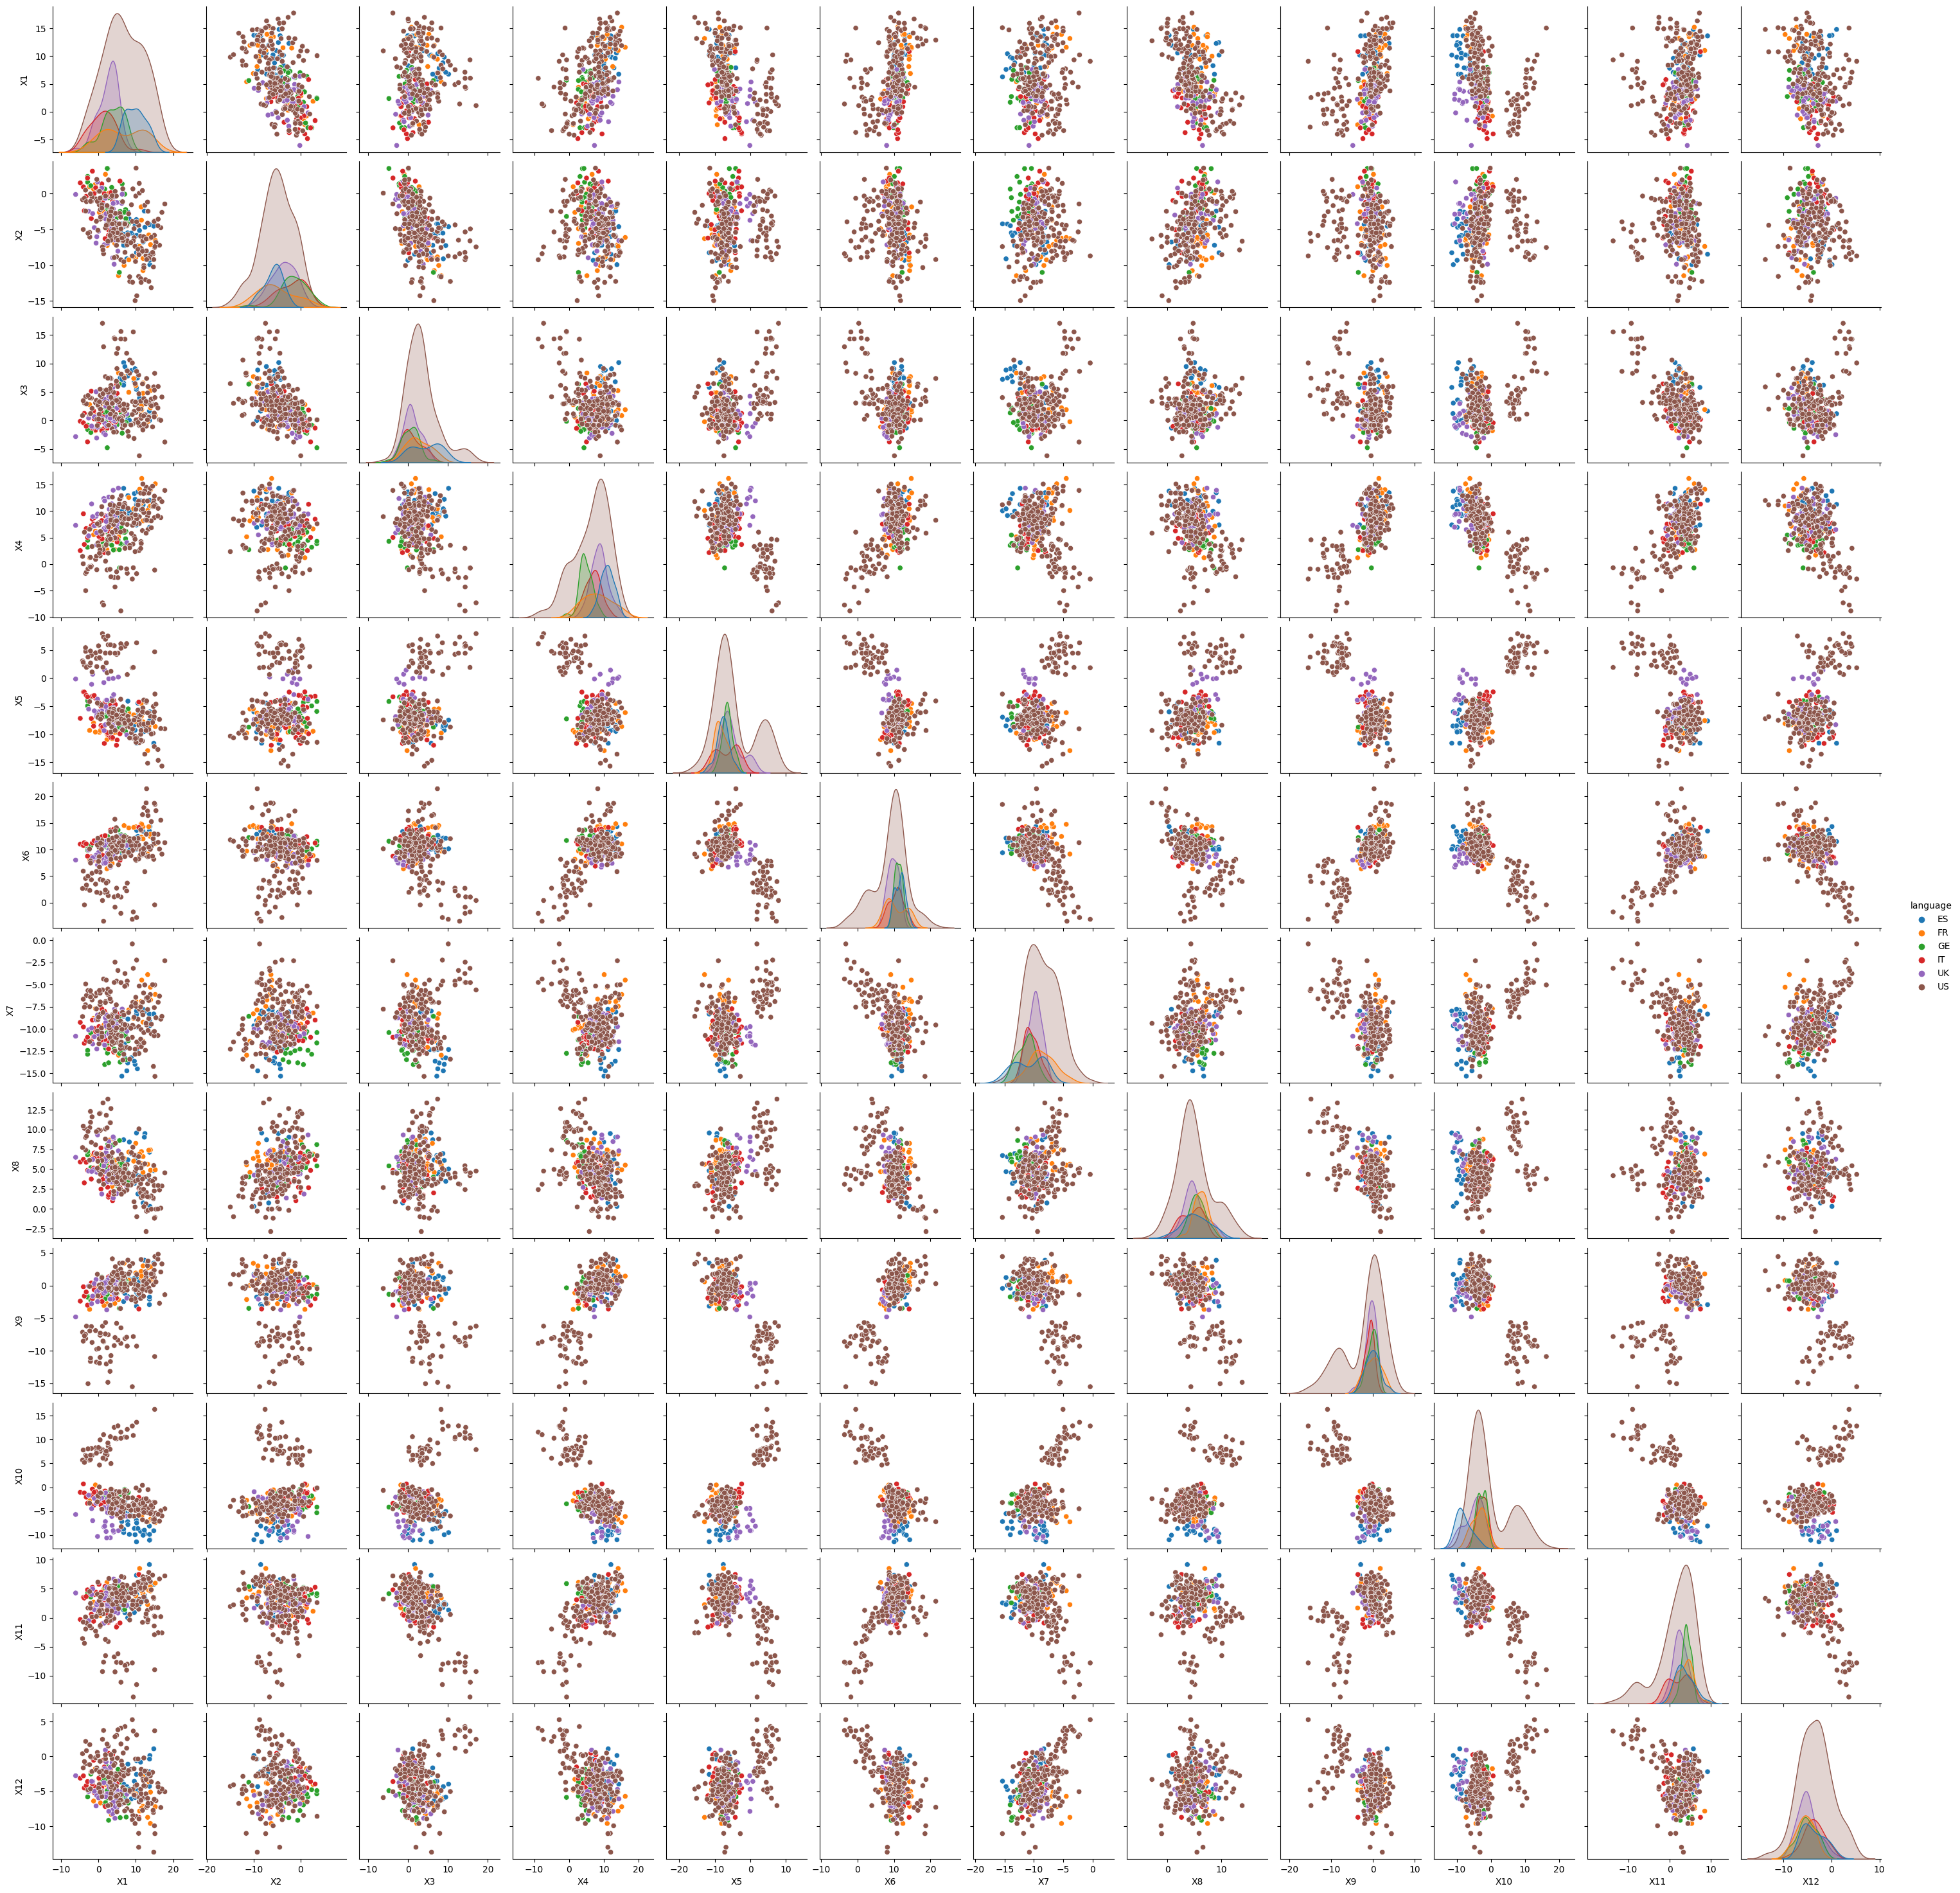

In [3]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(df.dropna(), hue='language')

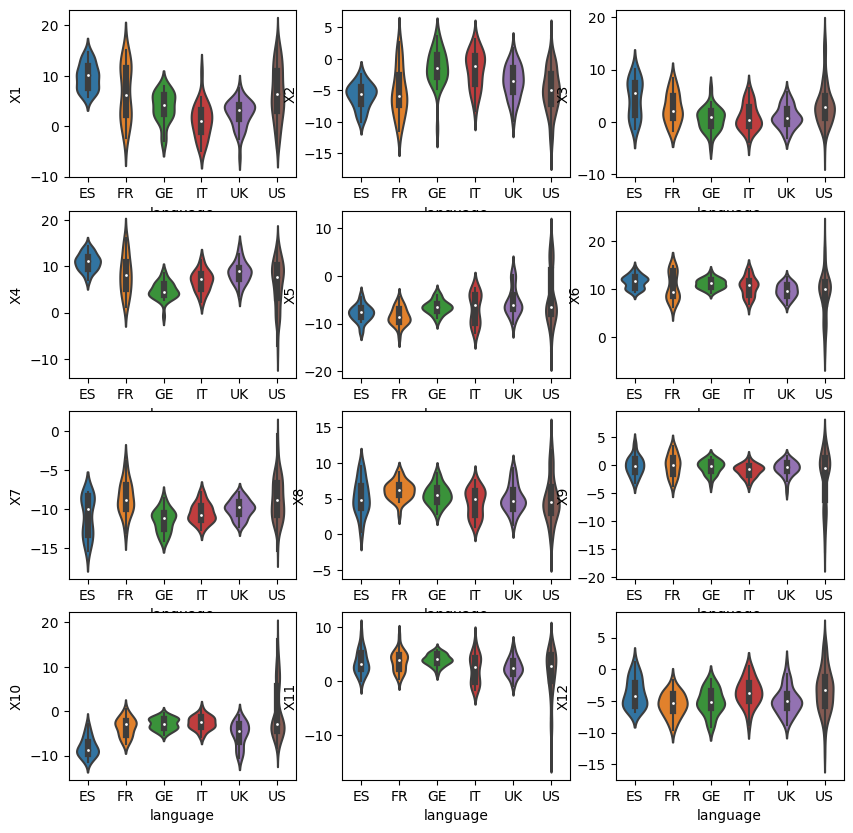

In [11]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df.columns):
    if column == 'language':
        continue
    plt.subplot(4, 3, column_index)
    sb.violinplot(x='language', y=column, data=df)

In [12]:
df = pd.read_csv('../data/accent-recognition-data.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = df[['X' + str(i) for i in range(1, 13)]].values

# Similarly, we can extract the class labels
all_labels = df['language'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[ 7.07147563e+00, -6.51289966e+00,  7.65079980e+00,
         1.11507832e+01, -7.65731234e+00,  1.24840206e+01,
        -1.17097719e+01,  3.42659639e+00,  1.46271520e+00,
        -2.81275273e+00,  8.66537752e-01, -5.24427382e+00],
       [ 1.09829672e+01, -5.15744505e+00,  3.95206022e+00,
         1.15293811e+01, -7.63804669e+00,  1.21360978e+01,
        -1.20362473e+01,  3.49194279e+00,  5.95440752e-01,
        -4.50881099e+00,  2.33214701e+00, -6.22185741e+00],
       [ 7.82710836e+00, -5.47747194e+00,  7.81625728e+00,
         9.18759183e+00, -7.17251059e+00,  1.17152994e+01,
        -1.38472138e+01,  4.57407483e+00, -1.68755929e+00,
        -7.20404059e+00, -1.18469028e-02, -6.46314403e+00],
       [ 6.74408266e+00, -5.68892029e+00,  6.54678866e+00,
         9.00018318e+00, -6.92496340e+00,  1.17107657e+01,
        -1.23743884e+01,  6.16987886e+00, -5.44746654e-01,
        -6.01923700e+00,  1.35855949e+00, -6.35644131e+00],
       [ 5.83684251e+00, -5.32655675e+00,  7.4722647

Now our data is ready to be split.

Import the train_test_split and create randomly training and testing sets with 75% of the examples on the training set and 25% on the testing set: training_inputs, testing_inputs, training_classes, testing_classes

In [13]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

With our data split, we can start fitting models to our data. Our company's Head of Data is all about decision tree classifiers, so let's start with one of those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries.

Here's an example decision tree classifier:

<img src="../../iris_dtc.png" />

Notice how the classifier asks Yes/No questions about the data — whether a certain feature is <= 1.75, for example — so it can differentiate the records. This is the essence of every decision tree.

The nice part about decision tree classifiers is that they are scale-invariant, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same. There are several parameters that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

Import the DecisionTreeClassifier and train the classifier on the training set showing the final score/accuracy.

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(training_inputs, training_classes)

clf.score(testing_inputs, testing_classes)

0.6626506024096386

The model achieves 66% classification accuracy. However, there's a catch: Depending on how our training and testing set was sampled, our accuracy can vary wildly.

Experiment 1000 times the classifier and plot a histogram of the obtained accuracies. 

(array([  1.,   1.,  17.,  59., 135., 331., 241., 179.,  33.,   3.]),
 array([0.40963855, 0.45060241, 0.49156627, 0.53253012, 0.57349398,
        0.61445783, 0.65542169, 0.69638554, 0.7373494 , 0.77831325,
        0.81927711]),
 <BarContainer object of 10 artists>)

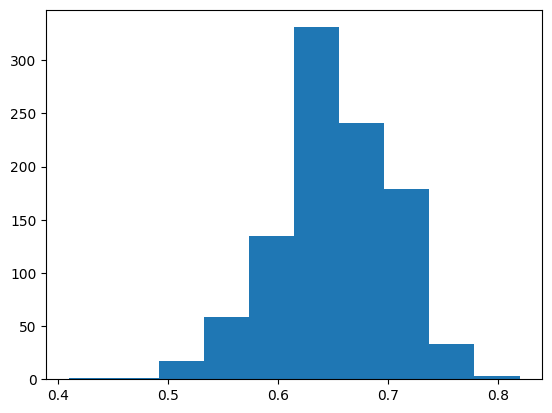

In [17]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    # Your Code Here
    clf = DecisionTreeClassifier()
    clf.fit(training_inputs, training_classes)
    model_accuracies.append(clf.score(testing_inputs, testing_classes))

plt.hist(model_accuracies)

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as overfitting: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before. 

This problem is the main reason that most data scientists perform k-fold cross-validation on their models: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once. 10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:(each square is an entry in our data set)

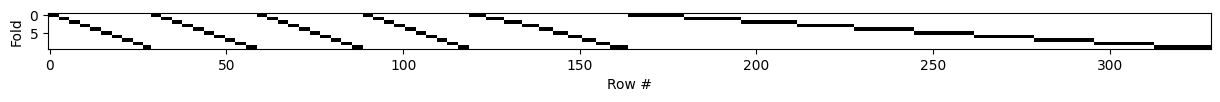

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

You'll notice that we used Stratified k-fold cross-validation in the code above. Stratified k-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `US` entries in one of the folds.)

Import StratifiedKFold and use stratified cross-validation with 10 splits and train again the data.

Text(0.5, 1.0, 'Average score: 0.6350378787878788')

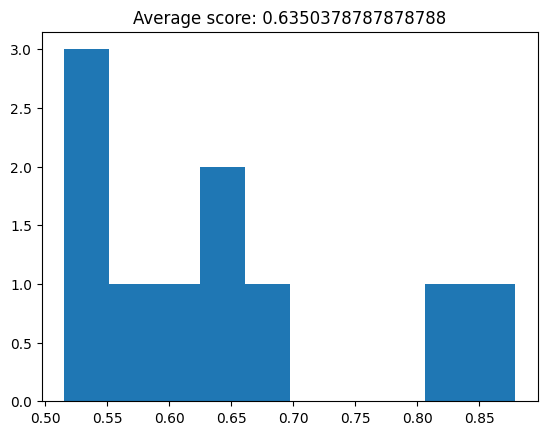

In [20]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10) 
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Now we have a much more consistent rating of our classifier's general classification accuracy. However, every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

Text(0.5, 1.0, 'Average score: 0.5289772727272727')

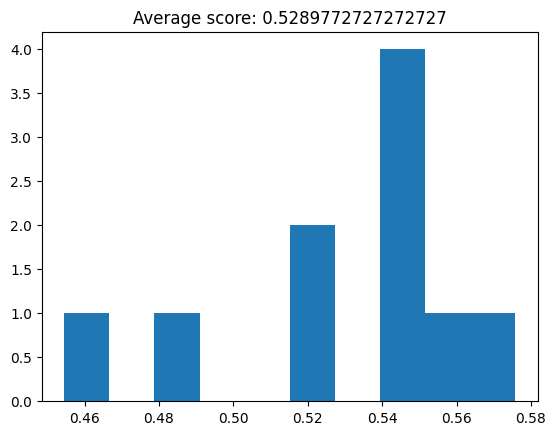

In [21]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

The classification accuracy falls tremendously! Therefore, we need to find a systematic method to discover the best parameters for our model and data set. 

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

p)	Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find the best parameters, visualizing the grid with the accuracies for each parameter’s pairs (max_features 1-4 and max_depth 1-5). 

In [22]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = 10

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid, 
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.5350378787878788
Best parameters: {'max_depth': 4, 'max_features': 4}


Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Text(50.722222222222214, 0.5, 'max_depth')

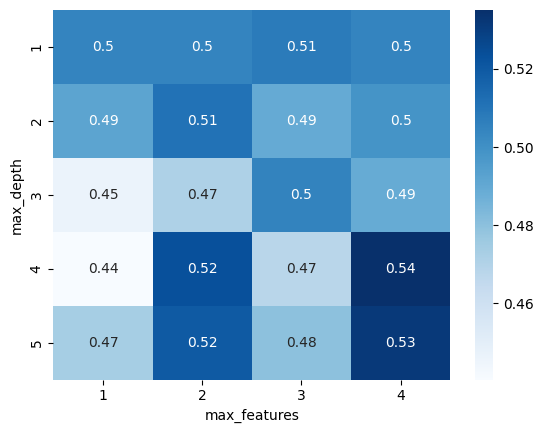

In [23]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision. `max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.) Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [24]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.5590909090909092
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [25]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [26]:
import sklearn.tree as tree

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

<img src="../../iris_dtc.png" />